<h2><center>
# Deep Learning Course
</center></h4> <h4><center>
 <img src="http://usblogs.pwc.com/emerging-technology/wp-content/uploads/2017/07/deep-learning-900x280.png" >


# Deep Learning Excercise 06
## TensorFlow and Keras

</center></h4>

Developed by [Sergio Castelblanco](http://www.linkedin.com/in/sergio-castelblanco/) - [Jhon Gonzalez](http://linkedin.com/in/jhon-franklin-gonzalez-gamboa-b6123230/)

Andes University

version 2.0, July 8 2018

In [1]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

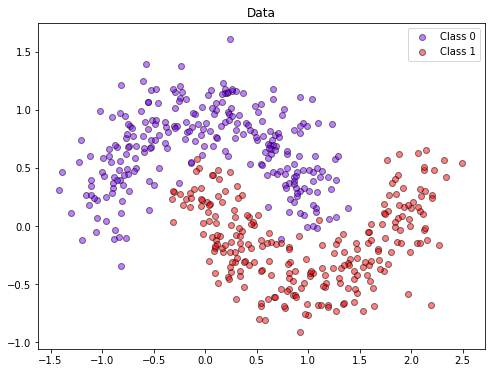

In [2]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

In [3]:
#HAY QUE AGREGAR UNA CAPA DE NEURONAS PARA QUE SEA NO LINEAL

In [4]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline


# Helper functions to inline visualization of computing graphs
# Extracted from: 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

Below we could see the Grapho created to achieve this excercise, as we can see there are a Train box which is connected to 3 main boxes (a loss, the inference and a hidden layer)

In [5]:
numN = 100
graph = tf.Graph()
with graph.as_default():
    
    #DATOS ENTRADA:
    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    
    with tf.name_scope('hidden_layer') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
   
        #h = tf.matmul(w_1,tf.transpose(x)) + b1
        h = tf.nn.relu(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid') #brosfcasting
   
    
    #MODELO INFERENCIA 
    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.nn.relu(tf.matmul(w_2,h) + b )

    #FUNCION DE PERDIDA (SIGMOIDE)
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
  
    #FUNCION ENTRENAMIENTO
    with tf.name_scope('train') as scope:
        learning_rate = 0.1
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    
show_graph(graph.as_graph_def())

Once we generate the grapho, we could see the evolution of the training data and the loss. Due to the shape curve, it seems that it is reached a minimum value, aproximately 0.35; so we are confident that there is a global solution and we will continue solving this excercise.

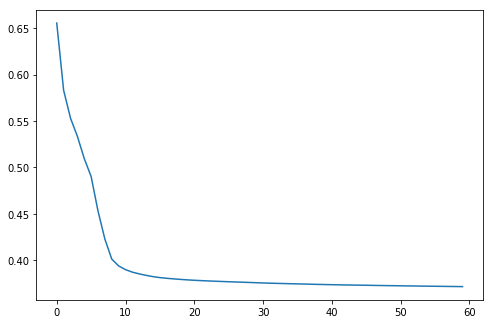

In [173]:
num_epochs = 3000
losses = []

with graph.as_default(): 
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train}) 
        if (step % 50 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train})) 
                       
pl.figure(figsize = (8,16/3)) 
pl.plot(losses)

At the end we got a curve line which classify between the two classes give it to this excercise

[[ 1.3061115  -1.7502869 ]
 [-0.6234344   1.5014112 ]
 [ 1.0634655   0.252648  ]
 [ 0.7683938   2.4154127 ]
 [-0.9120864  -0.03260696]
 [-0.756896    0.44962645]
 [-0.04427233  1.8760582 ]
 [-0.96289283 -1.1192825 ]
 [-2.1061306  -1.1836119 ]
 [ 2.6621196  -0.12455059]
 [-3.1964738  -0.63944906]
 [-0.3123617  -0.7551077 ]
 [-0.9932423  -0.9536904 ]
 [ 0.15627523 -1.2273679 ]
 [-1.7328153  -0.49349666]
 [ 0.47714788  0.33669013]
 [ 0.5664889   0.8541168 ]
 [-0.8290316  -0.47498122]
 [-1.4856923  -0.06590843]
 [ 1.3679562   0.06230938]
 [-0.54855597 -0.36114815]
 [-1.0025282   0.17201363]
 [ 1.8057685   0.12646608]
 [-0.78218836 -1.2774953 ]
 [-0.04659369 -3.2442904 ]
 [-0.3278019  -1.0964638 ]
 [-0.6335698   1.1033115 ]
 [ 0.2531783   0.76967067]
 [ 0.79297733 -1.3017038 ]
 [ 0.7834474  -1.8862936 ]
 [ 1.1482401   0.6157987 ]
 [ 0.5902362  -0.22307034]
 [-1.3233527  -0.3511993 ]
 [ 0.14573379  1.1243073 ]
 [ 0.9475668  -1.3243824 ]
 [-0.15332182  1.2757236 ]
 [-0.05743084 -0.6779969 ]
 

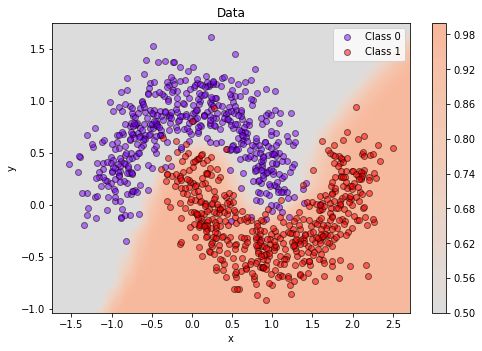

In [174]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

with graph.as_default():
    wval = sess.run(w_1)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])}) 
    print(result)
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, pred_fun)
plot_data(X, Y)

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


The first step is load data in the memory ausing the Keras structure as below:

In [7]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Activation

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

Using TensorFlow backend.


Loading data...
8982 train sequences
2246 test sequences
46 classes


In [179]:
print(x_train[103])

[1, 204, 790, 8, 77, 62, 2, 2, 31, 4, 807, 6, 4, 521, 562, 78, 588, 301, 6, 2, 689, 28, 228, 143, 411, 2, 92, 10, 163, 28, 4, 60, 13, 141, 2, 2, 50, 2, 4, 120, 77, 75, 2, 128, 140, 880, 7, 778, 9, 932, 499, 7, 496, 140, 68, 2, 179, 8, 4, 101, 880, 41, 444, 6, 2, 159, 2, 7, 861, 9, 2, 24, 190, 100, 97, 192, 510, 62, 994, 6, 30, 2, 2, 4, 308, 4, 204, 790, 297, 2, 21, 4, 2, 77, 45, 30, 2, 8, 4, 163, 5, 2, 22, 4, 103, 5, 83, 190, 75, 2, 10, 223, 22, 2, 2, 4, 73, 2, 791, 5, 4, 141, 423, 721, 21, 4, 2, 738, 2, 5, 4, 222, 2, 7, 2, 77, 2, 2, 222, 2, 51, 144, 34, 129, 2, 5, 2, 77, 8, 9, 569, 64, 170, 129, 2, 13, 2, 430, 22, 4, 2, 58, 204, 171, 17, 12]


In [8]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', '', '', 'said', '', '', 'a', 'of', 'make', '52', '', 'said', '', 'of', '1987', '', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', '', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', '', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', '', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', '', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']


In [9]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


## Modifying Different activation functions for the hidden layer 

We built a model varying the activation function with the goal to improve the performance of the text classifier in the Keras handout

## Activation functions `RelU` 

In [183]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_17 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_17 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_18 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_18 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [184]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [185]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 157us/step - loss: 2.4513 - acc: 0.4675 - val_loss: 1.9564 - val_acc: 0.5239
Epoch 2/5
8083/8083 [==============================] - 1s 126us/step - loss: 1.7844 - acc: 0.5670 - val_loss: 1.7383 - val_acc: 0.5851
Epoch 3/5
8083/8083 [==============================] - 1s 127us/step - loss: 1.6149 - acc: 0.6188 - val_loss: 1.6236 - val_acc: 0.6507
Epoch 4/5
8083/8083 [==============================] - 1s 127us/step - loss: 1.5020 - acc: 0.6592 - val_loss: 1.5395 - val_acc: 0.6774
Epoch 5/5
8083/8083 [==============================] - 1s 128us/step - loss: 1.4129 - acc: 0.6840 - val_loss: 1.4736 - val_acc: 0.6830


In [186]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 51us/step
Test score: 1.466112484808809
Test accuracy: 0.6687444345768498


When we modify the activation function to `RelU` the Test accuracy `0.6758` which is higher than the last model.

## Activation functions `tanh` 

In [187]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('tanh'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_19 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_19 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_20 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_20 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [188]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [189]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 139us/step - loss: 2.1999 - acc: 0.4918 - val_loss: 1.8261 - val_acc: 0.5584
Epoch 2/5
8083/8083 [==============================] - 1s 111us/step - loss: 1.6573 - acc: 0.6019 - val_loss: 1.6391 - val_acc: 0.6307
Epoch 3/5
8083/8083 [==============================] - 1s 111us/step - loss: 1.4963 - acc: 0.6547 - val_loss: 1.5295 - val_acc: 0.6674
Epoch 4/5
8083/8083 [==============================] - 1s 111us/step - loss: 1.3872 - acc: 0.6834 - val_loss: 1.4524 - val_acc: 0.6952
Epoch 5/5
8083/8083 [==============================] - 1s 112us/step - loss: 1.3038 - acc: 0.7068 - val_loss: 1.3957 - val_acc: 0.7041


In [190]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 51us/step
Test score: 1.376408041319673
Test accuracy: 0.6878895815047216


Using `tanh` we got a better accuracy compared with the previous model `0.6883`.

## Activation functions `SelU` 

In [195]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_23 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_23 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_24 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_24 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [196]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [197]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 151us/step - loss: 2.0383 - acc: 0.5135 - val_loss: 1.7053 - val_acc: 0.5951
Epoch 2/5
8083/8083 [==============================] - 1s 118us/step - loss: 1.5285 - acc: 0.6479 - val_loss: 1.5132 - val_acc: 0.6641
Epoch 3/5
8083/8083 [==============================] - 1s 118us/step - loss: 1.3548 - acc: 0.6980 - val_loss: 1.4037 - val_acc: 0.6919
Epoch 4/5
8083/8083 [==============================] - 1s 118us/step - loss: 1.2417 - acc: 0.7250 - val_loss: 1.3332 - val_acc: 0.7119
Epoch 5/5
8083/8083 [==============================] - 1s 118us/step - loss: 1.1571 - acc: 0.7439 - val_loss: 1.2804 - val_acc: 0.7297


In [198]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 54us/step
Test score: 1.2671480703226499
Test accuracy: 0.715939447933929


Then with `selu` we got a better accuracy compared with the 2 previous model `0.7159`.

## Activation functions `Sigmoid` 

In [199]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_25 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_25 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_26 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_26 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [200]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [201]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 148us/step - loss: 2.4239 - acc: 0.3530 - val_loss: 2.3320 - val_acc: 0.3315
Epoch 2/5
8083/8083 [==============================] - 1s 119us/step - loss: 2.1904 - acc: 0.4175 - val_loss: 2.1880 - val_acc: 0.4594
Epoch 3/5
8083/8083 [==============================] - 1s 122us/step - loss: 2.0774 - acc: 0.4758 - val_loss: 2.0947 - val_acc: 0.4816
Epoch 4/5
8083/8083 [==============================] - 1s 123us/step - loss: 1.9950 - acc: 0.4986 - val_loss: 2.0222 - val_acc: 0.4994
Epoch 5/5
8083/8083 [==============================] - 1s 121us/step - loss: 1.9315 - acc: 0.5117 - val_loss: 1.9698 - val_acc: 0.5072


In [202]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 52us/step
Test score: 1.9259476147903891
Test accuracy: 0.5235975067050778


Trying the `sigmoid` we decrease the accuracy to `0.52359`.

## Comparison of the activation functions

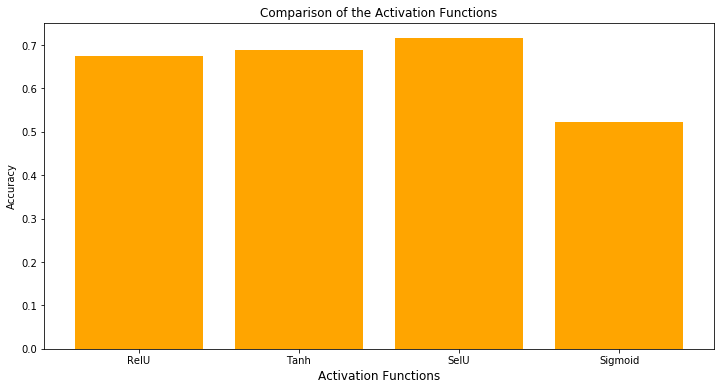

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(["RelU","Tanh","SelU","Sigmoid"],[0.6758,0.6883,0.7159,0.5235],color="orange",align='center')
plt.title("Comparison of the Activation Functions")
plt.xlabel("Activation Functions",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

## Modifying Different optimizers

Because the best activation function was  `SelU` it will be constant from now and we will change the others parameters.

##  Adam Optimizer

In [206]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_27 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_27 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_28 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_28 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [212]:
from keras.optimizers import adam
model.compile(loss='categorical_crossentropy',
              optimizer=adam(),
              metrics=['accuracy'])

In [213]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 226us/step - loss: 0.9542 - acc: 0.7830 - val_loss: 0.9912 - val_acc: 0.7709
Epoch 2/5
8083/8083 [==============================] - 2s 203us/step - loss: 0.5302 - acc: 0.8805 - val_loss: 0.9058 - val_acc: 0.7998
Epoch 3/5
8083/8083 [==============================] - 2s 201us/step - loss: 0.3793 - acc: 0.9129 - val_loss: 0.9735 - val_acc: 0.7964
Epoch 4/5
8083/8083 [==============================] - 2s 202us/step - loss: 0.2998 - acc: 0.9306 - val_loss: 1.0135 - val_acc: 0.7931
Epoch 5/5
8083/8083 [==============================] - 2s 203us/step - loss: 0.2606 - acc: 0.9365 - val_loss: 1.0490 - val_acc: 0.7820


In [214]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 55us/step
Test score: 1.0334739203126113
Test accuracy: 0.7791629563668745


The `adam` optimizer improve the accuracy to `0.7791`

## Adamax Optimizer 

In [248]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_31 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_31 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_32 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_32 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [215]:
from keras.optimizers import adamax
model.compile(loss='categorical_crossentropy',
              optimizer=adamax(),
              metrics=['accuracy'])

In [216]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 239us/step - loss: 0.2095 - acc: 0.9458 - val_loss: 1.0353 - val_acc: 0.7864
Epoch 2/5
8083/8083 [==============================] - 1s 175us/step - loss: 0.1634 - acc: 0.9525 - val_loss: 1.0776 - val_acc: 0.7809
Epoch 3/5
8083/8083 [==============================] - 1s 176us/step - loss: 0.1547 - acc: 0.9524 - val_loss: 1.0665 - val_acc: 0.7875
Epoch 4/5
8083/8083 [==============================] - 1s 175us/step - loss: 0.1510 - acc: 0.9526 - val_loss: 1.1251 - val_acc: 0.7842
Epoch 5/5
8083/8083 [==============================] - 1s 178us/step - loss: 0.1406 - acc: 0.9532 - val_loss: 1.1280 - val_acc: 0.7720


In [217]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 57us/step
Test score: 1.1295876303423968
Test accuracy: 0.7778272484416741


Using the `adamax` optimizer we got similar results than the Adam one accuracy `0.7778`.

## Adadelta Optimizer 

In [206]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_27 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_27 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_28 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_28 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [218]:
from keras.optimizers import adadelta
model.compile(loss='categorical_crossentropy',
              optimizer=adadelta(),
              metrics=['accuracy'])

In [219]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 299us/step - loss: 0.1587 - acc: 0.9520 - val_loss: 1.1434 - val_acc: 0.7731
Epoch 2/5
8083/8083 [==============================] - 2s 221us/step - loss: 0.1451 - acc: 0.9532 - val_loss: 1.2042 - val_acc: 0.7675
Epoch 3/5
8083/8083 [==============================] - 2s 218us/step - loss: 0.1411 - acc: 0.9557 - val_loss: 1.1940 - val_acc: 0.7720
Epoch 4/5
8083/8083 [==============================] - 2s 213us/step - loss: 0.1377 - acc: 0.9561 - val_loss: 1.1908 - val_acc: 0.7675
Epoch 5/5
8083/8083 [==============================] - 2s 212us/step - loss: 0.1333 - acc: 0.9527 - val_loss: 1.2709 - val_acc: 0.7642


In [220]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 58us/step
Test score: 1.2956785750198025
Test accuracy: 0.7653606411928804


The `adadelta` optimizer is quite below the other two considered so far accuracy `0.7653`

## Adagrad Optimizer

In [206]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_27 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_27 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_28 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_28 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [222]:
from keras.optimizers import adagrad
model.compile(loss='categorical_crossentropy',
              optimizer=adagrad(),
              metrics=['accuracy'])

In [223]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 197us/step - loss: 0.2616 - acc: 0.9339 - val_loss: 1.3321 - val_acc: 0.7597
Epoch 2/5
8083/8083 [==============================] - 1s 152us/step - loss: 0.1508 - acc: 0.9563 - val_loss: 1.3247 - val_acc: 0.7697
Epoch 3/5
8083/8083 [==============================] - 1s 152us/step - loss: 0.1304 - acc: 0.9572 - val_loss: 1.3266 - val_acc: 0.7642
Epoch 4/5
8083/8083 [==============================] - 1s 149us/step - loss: 0.1171 - acc: 0.9592 - val_loss: 1.3125 - val_acc: 0.7664
Epoch 5/5
8083/8083 [==============================] - 1s 150us/step - loss: 0.1108 - acc: 0.9572 - val_loss: 1.3366 - val_acc: 0.7653


In [224]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 57us/step
Test score: 1.3269470379167865
Test accuracy: 0.7720391807658059


The same we could see using the `adagrad` optimizer `0.7720`.

## Rmsprop Optimizer

In [206]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_27 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_27 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_28 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_28 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [235]:
from keras.optimizers import rmsprop
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop(),
              metrics=['accuracy'])

In [244]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 161us/step - loss: 0.1348 - acc: 0.9592 - val_loss: 1.8514 - val_acc: 0.7408
Epoch 2/5
8083/8083 [==============================] - 1s 158us/step - loss: 0.1361 - acc: 0.9572 - val_loss: 1.8697 - val_acc: 0.7486
Epoch 3/5
8083/8083 [==============================] - 1s 155us/step - loss: 0.1329 - acc: 0.9581 - val_loss: 1.8243 - val_acc: 0.7430
Epoch 4/5
8083/8083 [==============================] - 1s 158us/step - loss: 0.1324 - acc: 0.9592 - val_loss: 1.8065 - val_acc: 0.7464
Epoch 5/5
8083/8083 [==============================] - 1s 157us/step - loss: 0.1306 - acc: 0.9603 - val_loss: 1.8287 - val_acc: 0.7397


In [245]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 58us/step
Test score: 1.8372950519925233
Test accuracy: 0.7604630454140695


The `rmsprop` optimizer is given an accuracy of `0.7604`.

## SGD Optimizer 

In [250]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_33 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_33 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_34 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_34 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [251]:
from keras.optimizers import rmsprop
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [252]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 201us/step - loss: 2.0335 - acc: 0.5236 - val_loss: 1.6938 - val_acc: 0.6096
Epoch 2/5
8083/8083 [==============================] - 1s 125us/step - loss: 1.5292 - acc: 0.6491 - val_loss: 1.5101 - val_acc: 0.6741
Epoch 3/5
8083/8083 [==============================] - 1s 122us/step - loss: 1.3606 - acc: 0.6937 - val_loss: 1.4025 - val_acc: 0.6963
Epoch 4/5
8083/8083 [==============================] - 1s 126us/step - loss: 1.2470 - acc: 0.7228 - val_loss: 1.3290 - val_acc: 0.7164
Epoch 5/5
8083/8083 [==============================] - 1s 125us/step - loss: 1.1625 - acc: 0.7434 - val_loss: 1.2783 - val_acc: 0.7208


In [254]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 57us/step
Test score: 1.2745094628389244
Test accuracy: 0.7186108637843298


## Compare the Optimizers

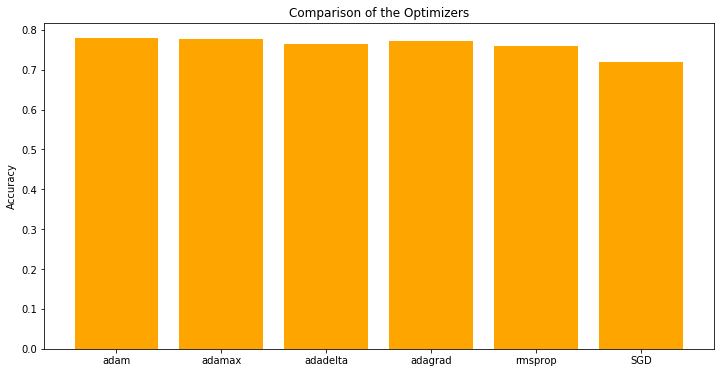

In [255]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(["adam","adamax","adadelta","adagrad","rmsprop","SGD"],[0.7791,0.7778,0.7653,0.7729,0.7604,0.7186],color="orange",align='center')
plt.title("Comparison of the Optimizers")
plt.xlabel("",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

All the optimizers tested showed a similar accuracy, however the `adam` ones is the best from them, so we will continue our job using this optimizer.

## Adding dropout to model
 
<img src="https://i1.wp.com/cdn-images-1.medium.com/max/800/1*iWQzxhVlvadk6VAJjsgXgg.png?resize=800%2C398&ssl=1" >

Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

In [19]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dropout(0.6,seed=123))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_5 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_5 (Activation)      (None, 256)                 0          
______________________________________________________________________
dropout_3 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_6 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_6 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [20]:
from keras.optimizers import adam
model.compile(loss='categorical_crossentropy',
              optimizer=adam(),
              metrics=['accuracy'])

In [21]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 334us/step - loss: 1.4442 - acc: 0.6822 - val_loss: 1.0626 - val_acc: 0.7620
Epoch 2/5
8083/8083 [==============================] - 2s 295us/step - loss: 0.8290 - acc: 0.8087 - val_loss: 0.9236 - val_acc: 0.7953
Epoch 3/5
8083/8083 [==============================] - 2s 295us/step - loss: 0.6354 - acc: 0.8483 - val_loss: 0.8874 - val_acc: 0.8042
Epoch 4/5
8083/8083 [==============================] - 2s 289us/step - loss: 0.5165 - acc: 0.8748 - val_loss: 0.8781 - val_acc: 0.8053
Epoch 5/5
8083/8083 [==============================] - 2s 291us/step - loss: 0.4456 - acc: 0.8910 - val_loss: 0.9144 - val_acc: 0.8009


In [22]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 59us/step
Test score: 0.888774013901
Test accuracy: 0.800089047195


When we include a `dropout` of `rate= 0.6`  in the neural network, it helped to improve the accuracy to `0.80`, and we are avoiding the overfitting.

## Modiying different initializers for the dense layers

## Kernel initializer `random_uniform` 

In [23]:
model = Sequential()
model.add(Dense(256, kernel_initializer='random_uniform',input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dropout(0.6,seed=123))
model.add(Dense(num_classes,kernel_initializer='random_uniform'))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_7 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_7 (Activation)      (None, 256)                 0          
______________________________________________________________________
dropout_4 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_8 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_8 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [24]:
from keras.optimizers import adam
model.compile(loss='categorical_crossentropy',
              optimizer=adam(),
              metrics=['accuracy'])

In [25]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 370us/step - loss: 1.4823 - acc: 0.6693 - val_loss: 1.1133 - val_acc: 0.7553
Epoch 2/5
8083/8083 [==============================] - 2s 297us/step - loss: 0.8656 - acc: 0.8064 - val_loss: 0.9425 - val_acc: 0.7875
Epoch 3/5
8083/8083 [==============================] - 2s 288us/step - loss: 0.6741 - acc: 0.8445 - val_loss: 0.9122 - val_acc: 0.7976
Epoch 4/5
8083/8083 [==============================] - 2s 296us/step - loss: 0.5478 - acc: 0.8721 - val_loss: 0.8690 - val_acc: 0.8053
Epoch 5/5
8083/8083 [==============================] - 2s 297us/step - loss: 0.4547 - acc: 0.8911 - val_loss: 0.8896 - val_acc: 0.8009


In [26]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 51us/step
Test score: 0.86949750789
Test accuracy: 0.79964381122


When we Modifying `kernel_initializer` with `random_uniform` in the neural network model, it helped to improve the accuracy `0.7956`.

## Kernel initializer `random_normal` 

In [27]:
model = Sequential()
model.add(Dense(256, kernel_initializer='random_normal',input_shape=(max_words,)))
model.add(Activation('selu'))
model.add(Dropout(0.6,seed=123))
model.add(Dense(num_classes,kernel_initializer='random_normal'))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_9 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_9 (Activation)      (None, 256)                 0          
______________________________________________________________________
dropout_5 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_10 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_10 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [28]:
from keras.optimizers import adam
model.compile(loss='categorical_crossentropy',
              optimizer=adam(),
              metrics=['accuracy'])

In [29]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 356us/step - loss: 1.4596 - acc: 0.6700 - val_loss: 1.0786 - val_acc: 0.7564
Epoch 2/5
8083/8083 [==============================] - 2s 299us/step - loss: 0.8725 - acc: 0.7998 - val_loss: 0.9328 - val_acc: 0.7942
Epoch 3/5
8083/8083 [==============================] - 2s 296us/step - loss: 0.6631 - acc: 0.8460 - val_loss: 0.9110 - val_acc: 0.8020
Epoch 4/5
8083/8083 [==============================] - 2s 304us/step - loss: 0.5481 - acc: 0.8705 - val_loss: 0.8803 - val_acc: 0.8020
Epoch 5/5
8083/8083 [==============================] - 2s 299us/step - loss: 0.4737 - acc: 0.8861 - val_loss: 0.9029 - val_acc: 0.8065


In [30]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 121us/step
Test score: 0.86922868383
Test accuracy: 0.795191451469


When we Modifying `kernel_initializer` with `random_normal` in the neural network model, it helped to improve the accuracy `0.7978`.

## Comparison of the kernel initializer

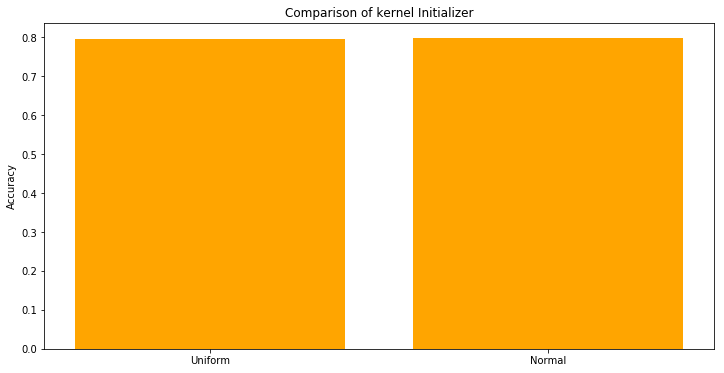

In [287]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(["Uniform","Normal"],[0.7956,0.7978],color="orange",align='center')
plt.title("Comparison of kernel Initializer")
plt.xlabel("",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

## Comparison of the Text Classification Models

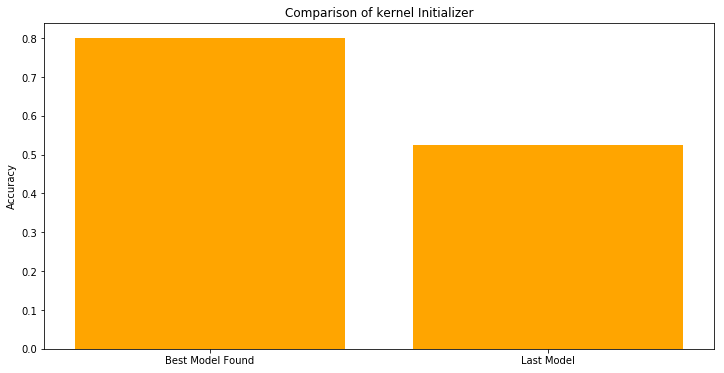

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(["Best Model Found","Last Model"],[0.800,0.5258],color="orange",align='center')
plt.title("Comparison of kernel Initializer")
plt.xlabel("",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

Finally we have found a better text classifier in Keras with the next hyperparameters:

```python
model.add(Activation('selu'))
model.compile(optimizer=adam())
model.add(Dropout(0.6,seed=123))
model.add(kernel_initializer='random_normal')
print('Test accuracy best Model:', 0.800)
print('Test accuracy Last Model:', 0.5258)
```